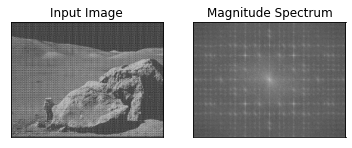

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

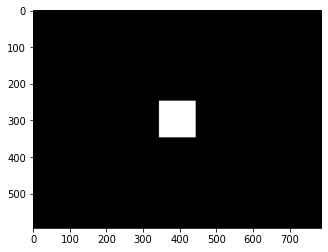

In [3]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [4]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\Svetlana\AppData\Local\Temp\ipykernel_3864\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


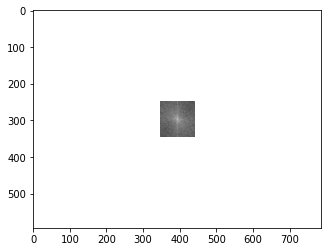

In [7]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [ ]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

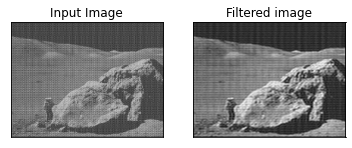

In [17]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

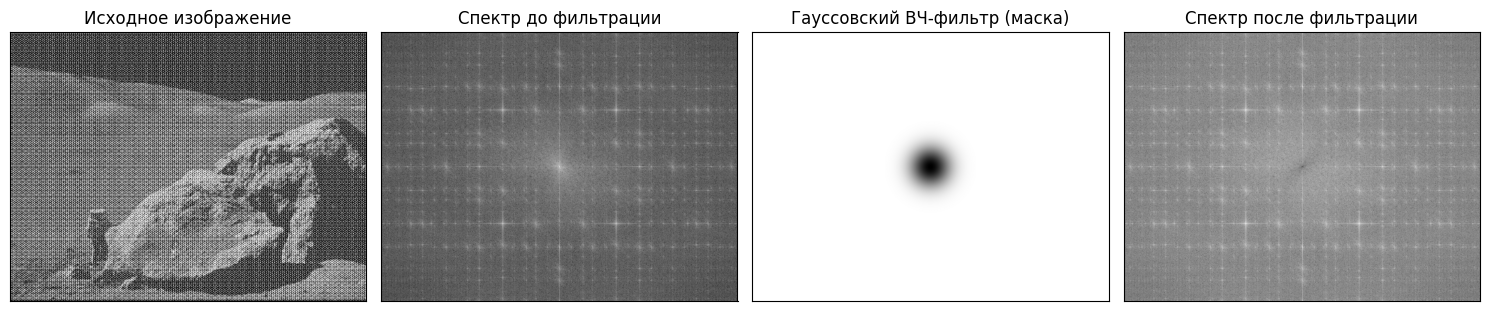

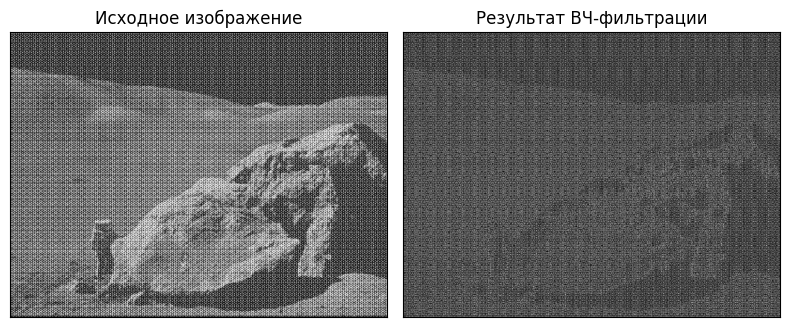

In [2]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_before = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

u = np.arange(cols) - ccol
v = np.arange(rows) - crow
V, U = np.meshgrid(v, u, indexing='ij')

D2 = U**2 + V**2
sigma = 30.0

H_low = np.exp(-D2 / (2 * (sigma**2)))
H_high = 1 - H_low

mask = np.zeros((rows, cols, 2), np.float32)
mask[:,:,0] = H_high
mask[:,:,1] = H_high

dft_shift_hp = dft_shift * mask

magnitude_after = 20*np.log(cv.magnitude(dft_shift_hp[:,:,0], dft_shift_hp[:,:,1]) + 1)

f_ishift = np.fft.ifftshift(dft_shift_hp)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

img_back_norm = cv.normalize(img_back, None, 0, 255, cv.NORM_MINMAX)
img_back_norm = np.uint8(img_back_norm)

plt.figure(figsize=(15,4))

plt.subplot(141), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])

plt.subplot(142), plt.imshow(magnitude_before, cmap='gray')
plt.title('Спектр до фильтрации'), plt.xticks([]), plt.yticks([])

plt.subplot(143), plt.imshow(H_high, cmap='gray')
plt.title('Гауссовский ВЧ-фильтр (маска)'), plt.xticks([]), plt.yticks([])

plt.subplot(144), plt.imshow(magnitude_after, cmap='gray')
plt.title('Спектр после фильтрации'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_back_norm, cmap='gray')
plt.title('Результат ВЧ-фильтрации'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

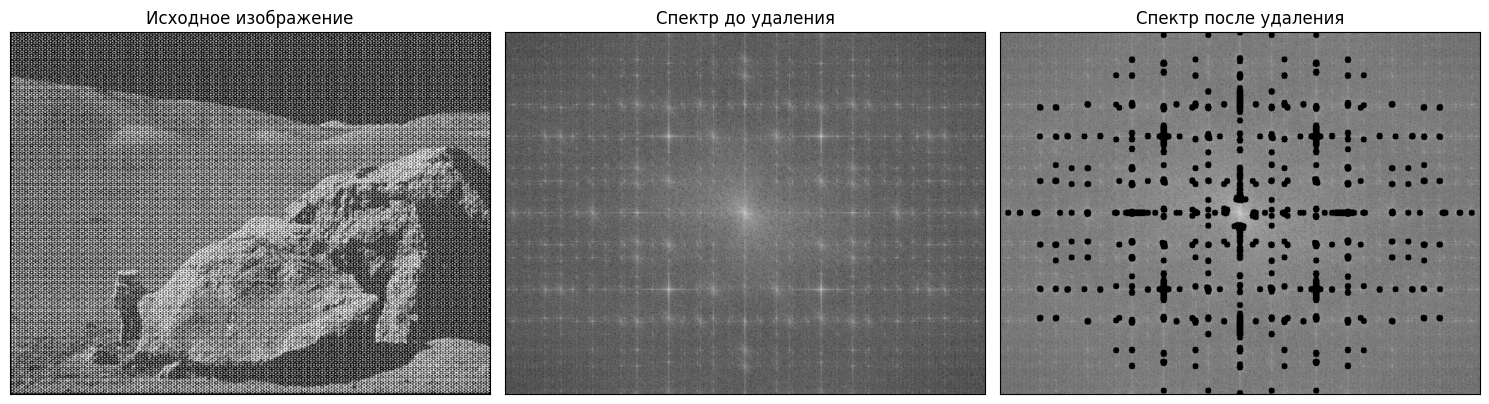

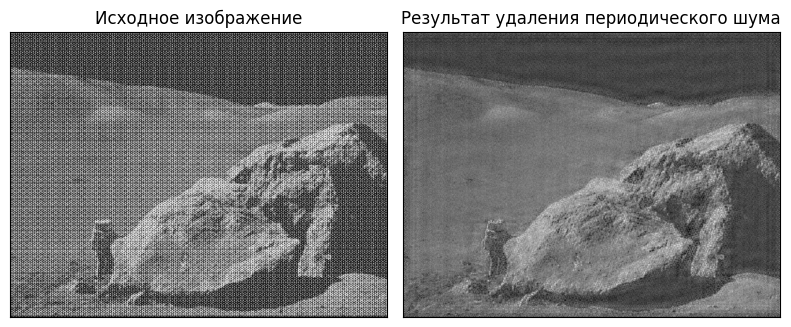

In [5]:
# Реализуйте удаление периодического шума
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude = cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude_spectrum = 20 * np.log(magnitude + 1)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mag_for_peaks = magnitude_spectrum.copy()
r0 = 20
mag_for_peaks[crow - r0:crow + r0, ccol - r0:ccol + r0] = 0

mean_val = mag_for_peaks.mean()
std_val = mag_for_peaks.std()
th = mean_val + 3 * std_val

peak_mask = mag_for_peaks > th
peak_coords = np.argwhere(peak_mask)

notch = np.ones((rows, cols), np.float32)
radius = 5 

for y, x in peak_coords:
    cv.circle(notch, (x, y), radius, 0, -1)

mask = np.zeros((rows, cols, 2), np.float32)
mask[:, :, 0] = notch
mask[:, :, 1] = notch
dft_shift_filtered = dft_shift * mask

magnitude_spectrum_filtered = 20 * np.log(
    cv.magnitude(dft_shift_filtered[:, :, 0],
                 dft_shift_filtered[:, :, 1]) + 1
)

f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

img_back_norm = cv.normalize(img_back, None, 0, 255, cv.NORM_MINMAX)
img_back_norm = np.uint8(img_back_norm)


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр до удаления')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Спектр после удаления')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_back_norm, cmap='gray')
plt.title('Результат удаления периодического шума')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
